In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

[Download world_bank_data.xlsx](https://docs.google.com/spreadsheets/d/1c5Rbx3H7SAElM4vqeRqszQe9iE1zpnbD/edit?usp=drive_link)


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_excel("/content/drive/MyDrive/ECON442/world_bank_data.xlsx")

In [4]:
df = df.drop(columns=("Series Code"))

In [5]:
id_vars = ["Country Name", "Country Code", "Series Name"]
value_vars = [col for col in df.columns if col not in id_vars]

df_dis = df.melt(
    id_vars=id_vars,
    value_vars=value_vars,
    var_name="Year",
    value_name="Value")

In [6]:
df_dis["Year"] = df_dis["Year"].str.extract(r"(\d{4})")
df_dis["Year"] = pd.to_numeric(df_dis["Year"], errors="coerce")
df_dis["Value"] = pd.to_numeric(df_dis["Value"], errors="coerce")

In [7]:
df_pivot = df_dis.pivot_table(
    index=["Country Name", "Country Code", "Year"],
    columns="Series Name",
    values="Value"
).reset_index()

In [8]:
df = df_pivot.dropna(thresh=5)
df.head()

Series Name,Country Name,Country Code,Year,"Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)",GDP growth (annual %),GDP per capita (current US$),Gross capital formation (% of GDP),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),Trade (% of GDP)
0,Afghanistan,AFG,1975,NaN,NaN,NaN,NaN,NaN,NaN,39.994,2.415250,NaN
1,Afghanistan,AFG,1976,NaN,NaN,NaN,NaN,NaN,NaN,40.518,2.213446,NaN
2,Afghanistan,AFG,1977,NaN,NaN,NaN,NaN,NaN,NaN,41.082,2.128100,NaN
3,Afghanistan,AFG,1978,NaN,NaN,NaN,NaN,NaN,NaN,40.086,2.008698,NaN
4,Afghanistan,AFG,1979,NaN,NaN,NaN,NaN,NaN,NaN,38.844,0.323659,NaN


In [9]:
df.columns = [
    col.lower()
       .replace(" ", "_")
       .replace("(", "")
       .replace(")", "")
       .replace("%", "percent")
       .replace(",", "")
       .replace("+", "plus")
       .replace("-", "_")
       .replace("__", "_")
       for col in df.columns
]

In [10]:
rename_dict = {
    "educational_attainment_at_least_completed_short_cycle_tertiary_population_25plus_total_percent_cumulative": "education_attainment",
    "gdp_growth_annual_percent": "gdp_growth",
    "gdp_per_capita_current_us$": "gdp_per_capita",
    "gross_capital_formation_percent_of_gdp": "investment_rate",
    "inflation_gdp_deflator_annual_percent": "inflation_deflator",
    "inflation_consumer_prices_annual_percent": "inflation_cpi",
    "life_expectancy_at_birth_total_years": "life_expectancy",
    "population_growth_annual_percent": "population_growth",
    "trade_percent_of_gdp": "trade_openness"
}

df = df.rename(columns=rename_dict)

In [11]:
df.to_csv("cleaned_world_bank_data.csv", index=False)

In [12]:
df.head()

,country_name,country_code,year,education_attainment,gdp_growth,gdp_per_capita,investment_rate,inflation_deflator,inflation_cpi,life_expectancy,population_growth,trade_openness
0,Afghanistan,AFG,1975,NaN,NaN,NaN,NaN,NaN,NaN,39.994,2.415250,NaN
1,Afghanistan,AFG,1976,NaN,NaN,NaN,NaN,NaN,NaN,40.518,2.213446,NaN
2,Afghanistan,AFG,1977,NaN,NaN,NaN,NaN,NaN,NaN,41.082,2.128100,NaN
3,Afghanistan,AFG,1978,NaN,NaN,NaN,NaN,NaN,NaN,40.086,2.008698,NaN
4,Afghanistan,AFG,1979,NaN,NaN,NaN,NaN,NaN,NaN,38.844,0.323659,NaN


In [13]:
features = [
    "education_attainment",
    "gdp_per_capita",
    "investment_rate",
    "inflation_deflator",
    "inflation_cpi",
    "life_expectancy",
    "population_growth",
    "trade_openness"
]

X = df[features]
y = df['gdp_growth']

In [14]:
df.head()

,country_name,country_code,year,education_attainment,gdp_growth,gdp_per_capita,investment_rate,inflation_deflator,inflation_cpi,life_expectancy,population_growth,trade_openness
0,Afghanistan,AFG,1975,NaN,NaN,NaN,NaN,NaN,NaN,39.994,2.415250,NaN
1,Afghanistan,AFG,1976,NaN,NaN,NaN,NaN,NaN,NaN,40.518,2.213446,NaN
2,Afghanistan,AFG,1977,NaN,NaN,NaN,NaN,NaN,NaN,41.082,2.128100,NaN
3,Afghanistan,AFG,1978,NaN,NaN,NaN,NaN,NaN,NaN,40.086,2.008698,NaN
4,Afghanistan,AFG,1979,NaN,NaN,NaN,NaN,NaN,NaN,38.844,0.323659,NaN


In [15]:
# Calculate % completeness for each country
completeness_ratio = df.groupby("country_name")[features].apply(lambda x: x.notnull().mean().mean())
top_countries = completeness_ratio[completeness_ratio >= 0.9].sort_values(ascending=False)
top_countries.index.tolist()


['Portugal',
 'United States',
 'South Africa',
 'Mexico',
 'Spain',
 'Turkiye',
 'Norway',
 'Korea, Rep.',
 'Singapore',
 'Denmark',
 'Australia',
 'Indonesia',
 'Italy',
 'Finland',
 'Bolivia',
 'Germany',
 'Colombia',
 'Israel',
 'Uruguay',
 'France',
 'Sweden',
 'Austria',
 'Canada',
 'Netherlands',
 'Cyprus',
 'Greece',
 'Peru',
 'Chile',
 'Luxembourg',
 'El Salvador',
 'Belgium',
 'Malta',
 'Paraguay',
 'United Kingdom',
 'Thailand',
 'Switzerland',
 'Dominican Republic',
 'Iran, Islamic Rep.',
 'Iceland',
 'Ireland',
 'Guatemala',
 'Honduras',
 'Costa Rica',
 'Egypt, Arab Rep.',
 'Brazil',
 'Kuwait',
 'Mauritius',
 'Hong Kong SAR, China',
 'New Zealand']

In [16]:
df = df.dropna()

In [17]:
df

,country_name,country_code,year,education_attainment,gdp_growth,gdp_per_capita,investment_rate,inflation_deflator,inflation_cpi,life_expectancy,population_growth,trade_openness
45,Afghanistan,AFG,2020,4.702539,-2.351101,510.787063,11.500000,6.962946,5.601888,61.454,3.153609,46.709895
46,Afghanistan,AFG,2021,3.070000,-20.738839,356.496214,13.000000,2.838996,5.133203,60.417,2.356098,51.411716
76,Albania,ALB,2001,7.430000,8.293313,1281.659826,34.988670,3.810857,3.107588,75.083,-0.938470,66.491024
83,Albania,ALB,2008,9.820000,7.500041,4370.539716,35.778424,4.117085,3.320871,78.248,-0.767343,77.451751
85,Albania,ALB,2010,9.982017,3.706938,4094.349686,30.308670,4.493143,3.627101,78.414,-0.496462,76.543390
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,Zimbabwe,ZWE,2014,13.050000,1.484543,1372.212781,9.639224,0.624974,-0.197785,58.106,1.371694,54.671615
10736,Zimbabwe,ZWE,2017,9.420000,4.080264,3448.082537,3.339739,199.324941,0.893962,60.263,1.442854,17.225118
10738,Zimbabwe,ZWE,2019,19.762909,-6.332446,1684.027904,13.799352,225.394648,255.304991,61.060,1.563534,55.795961
10740,Zimbabwe,ZWE,2021,17.436903,8.468017,1724.387731,15.507058,113.294981,98.546105,60.135,1.726011,50.847128


## EDA

In [18]:
df["country_name"].value_counts().count()

np.int64(160)

In [19]:
df["country_name"].value_counts()

,count
country_name,
Portugal,28
United States,25
South Africa,24
Mexico,23
Spain,23
...,...
Curacao,1
Morocco,1
Nicaragua,1


In [20]:
features = [
    "education_attainment",
     "investment_rate",
    "inflation_cpi",
    "life_expectancy",
    "population_growth",
    "trade_openness"
]
X = df[features]
y = df['gdp_growth']

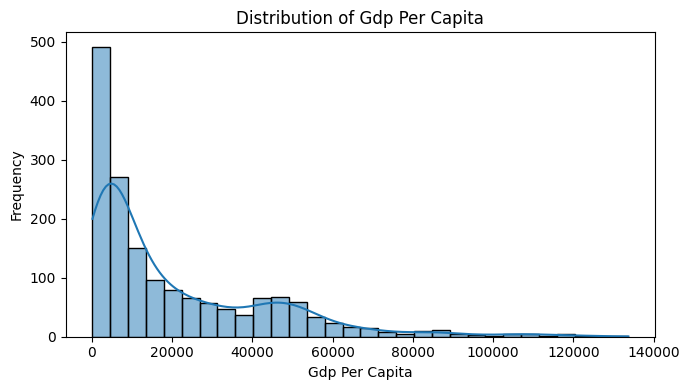

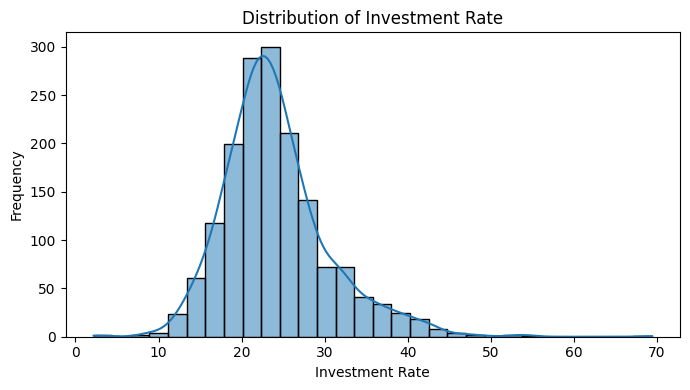

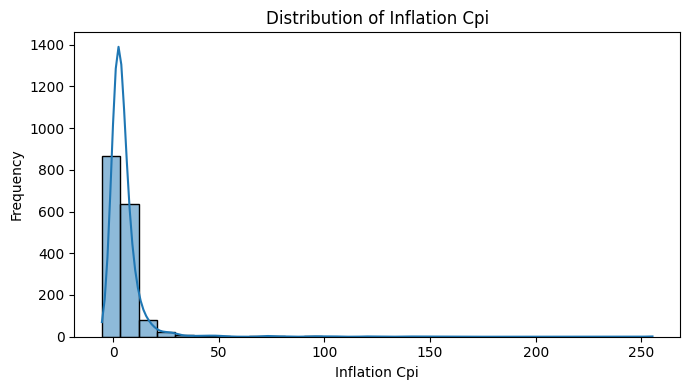

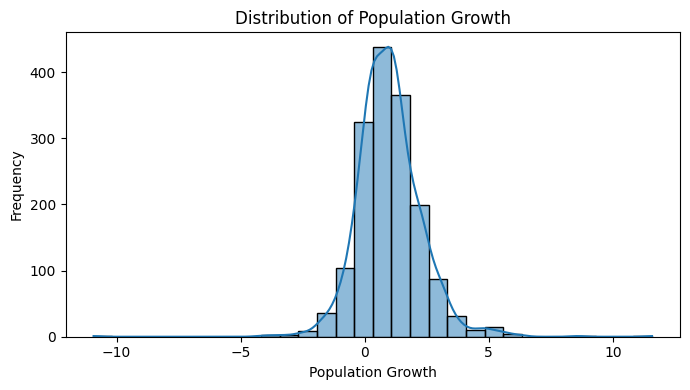

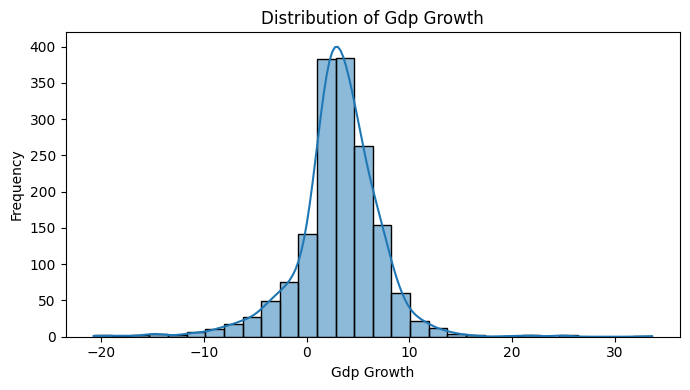

In [21]:
# ---- Distribution Plots ----
features_to_plot = [
    "gdp_per_capita",
    "investment_rate",
    "inflation_cpi",
    "population_growth",
    "gdp_growth"
]

for feature in features_to_plot:
    plt.figure(figsize=(7,4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature.replace('_',' ').title()}")
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Differences From Original project begin here
## New Section

In [22]:
print(y)

45       -2.351101
46      -20.738839
76        8.293313
83        7.500041
85        3.706938
           ...    
10733     1.484543
10736     4.080264
10738    -6.332446
10740     8.468017
10741     6.139263
Name: gdp_growth, Length: 1630, dtype: float64


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

In [25]:
initial_gdp = df.sort_values(by="year").groupby("country_name").first()[["gdp_per_capita"]]
initial_gdp.columns = ["initial_gdp"]

df = df.merge(initial_gdp, on="country_name", how="left")


In [26]:
hdi = pd.read_csv("/content/drive/MyDrive/ECON442/HDI_cleaned.csv")#

In [27]:
hdi

,Country,HDI
0,Iceland,0.972
1,Norway,0.970
2,Switzerland,0.970
3,Denmark,0.962
4,Germany,0.959
...,...,...
188,Niger,0.419
189,Chad,0.416
190,Central African Republic,0.414
191,Somalia,0.404


In [28]:
merged_df = pd.merge(df, hdi, left_on='country_name', right_on='Country', how='inner')


merged_df.head()


,country_name,country_code,year,education_attainment,gdp_growth,gdp_per_capita,investment_rate,inflation_deflator,inflation_cpi,life_expectancy,population_growth,trade_openness,initial_gdp,Country,HDI
0,Afghanistan,AFG,2020,4.702539,-2.351101,510.787063,11.500000,6.962946,5.601888,61.454,3.153609,46.709895,510.787063,Afghanistan,0.496
1,Afghanistan,AFG,2021,3.070000,-20.738839,356.496214,13.000000,2.838996,5.133203,60.417,2.356098,51.411716,510.787063,Afghanistan,0.496
2,Albania,ALB,2001,7.430000,8.293313,1281.659826,34.988670,3.810857,3.107588,75.083,-0.938470,66.491024,1281.659826,Albania,0.810
3,Albania,ALB,2008,9.820000,7.500041,4370.539716,35.778424,4.117085,3.320871,78.248,-0.767343,77.451751,1281.659826,Albania,0.810
4,Albania,ALB,2010,9.982017,3.706938,4094.349686,30.308670,4.493143,3.627101,78.414,-0.496462,76.543390,1281.659826,Albania,0.810


Cluster centers (HDI): [[0.64362363]
 [0.88390299]]
HDI_category
Higher HDI    1072
Lower HDI      364
Name: count, dtype: int64


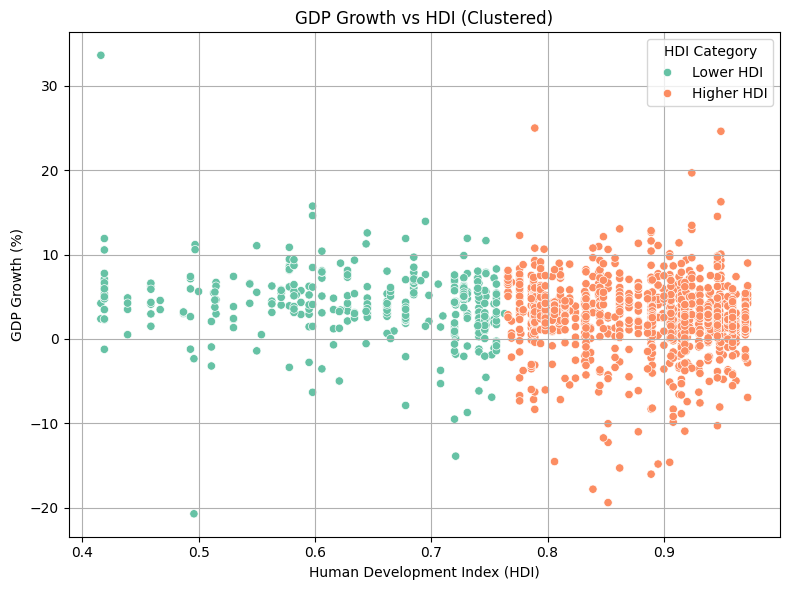

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster on HDI
HDI = merged_df[["HDI"]]

# Fit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
merged_df['HDI_cluster'] = kmeans.fit_predict(HDI)

# Show cluster centers
print("Cluster centers (HDI):", kmeans.cluster_centers_)

# Reorder cluster labels so that 0 = Low HDI, 1 = High HDI
if kmeans.cluster_centers_[0][0] > kmeans.cluster_centers_[1][0]:
    merged_df['HDI_cluster'] = merged_df['HDI_cluster'].map({0:1, 1:0})

# Assign readable labels
merged_df['HDI_category'] = merged_df['HDI_cluster'].map({0: 'Lower HDI', 1: 'Higher HDI'})

# Check counts
print(merged_df['HDI_category'].value_counts())

# Plot GDP Growth vs HDI, colored by cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x="HDI", y="gdp_growth", hue="HDI_category", data=merged_df, palette="Set2")
plt.title("GDP Growth vs HDI (Clustered)")
plt.xlabel("Human Development Index (HDI)")
plt.ylabel("GDP Growth (%)")
plt.grid(True)
plt.tight_layout()
plt.legend(title="HDI Category")
plt.show()


In [30]:
df_developed=merged_df[merged_df['HDI_category']=='Higher HDI']
df_developing=merged_df[merged_df['HDI_category']=='Lower HDI']

In [48]:
X_developed = df_developed[features]
y_developed = df_developed['gdp_growth']


X_train_developed, X_test_developed, y_train_developed, y_test_developed = train_test_split(X_developed, y_developed, test_size=0.2, random_state=42)



In [50]:
rf_model_developed = RandomForestRegressor(random_state=42)
rf_model_developed.fit(X_train_developed, y_train_developed)
y_pred_rf_developed = rf_model_developed.predict(X_test_developed)
#score
print("Train R2:", r2_score(y_train_developed, rf_model_developed.predict(X_train_developed)))
print("Test R2:", r2_score(y_test_developed, y_pred_rf_developed))

Train R2: 0.8701935656883725
Test R2: 0.11328710323519786


In [33]:

param_grid = {
    'n_estimators': [50, 100, 200,500],
    'max_depth': [3, 5, 10,20,30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}
grid_search_developed= GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
grid_search_developed.fit(X_train_developed, y_train_developed)
best_model_developed = grid_search_developed.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [34]:
#score
best_model_developed.score(X_train_developed, y_train_developed)

0.876915025332788

In [35]:
#pred
y_pred_grid_developed = best_model_developed.predict(X_test_developed)
best_model_developed.score(X_test_developed, y_test_developed)

0.12260189246108144

In [36]:
X_developing = df_developing[features]
y_developing = df_developing['gdp_growth']

X_train_developing, X_test_developing, y_train_developing, y_test_developing = train_test_split(X_developing, y_developing, test_size=0.2, random_state=42)

In [54]:

grid_search_developing= GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
grid_search_developing.fit(X_train_developing, y_train_developing)
best_model_developing = grid_search_developing.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


KeyboardInterrupt: 

In [38]:
best_model_developing.score(X_train_developing, y_train_developing)

0.6805904657292536

In [56]:
y_pred_grid_developing = best_model_developing.predict(X_test_developing)
best_model_developing.score(X_test_developing, y_test_developing)
#

0.11384073787748594

In [40]:
feature_importances_developing = best_model_developing.feature_importances_

In [41]:
feature_importances_developed = best_model_developed.feature_importances_

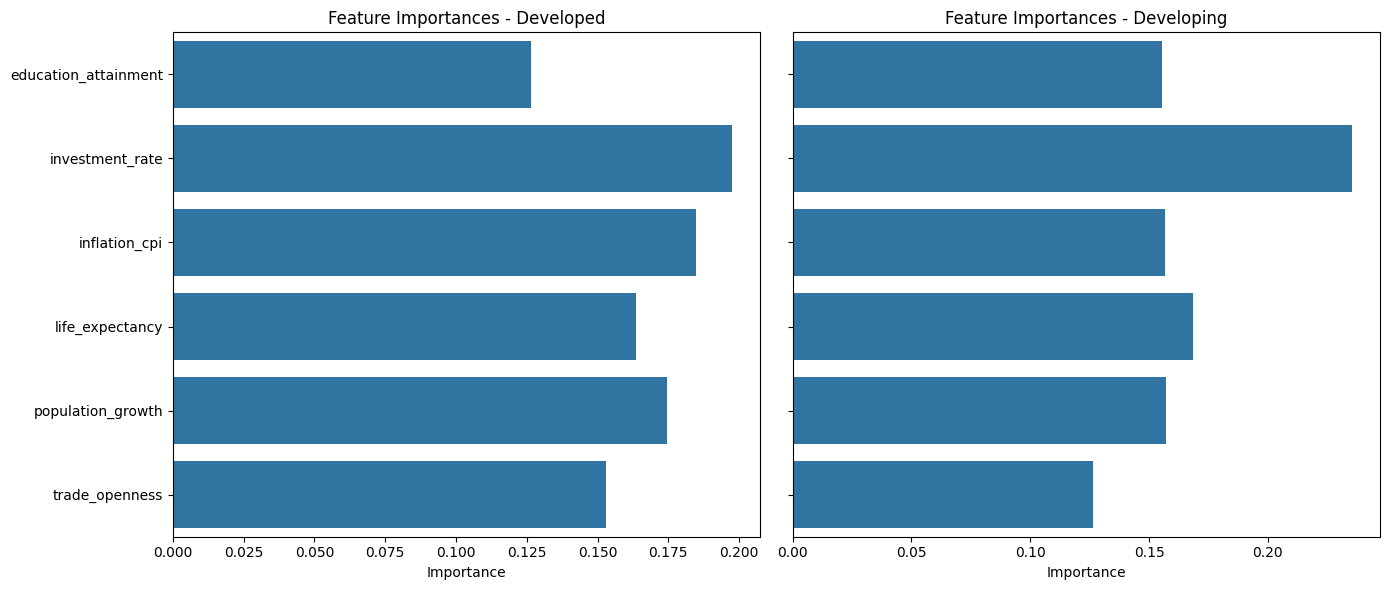

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(x=feature_importances_developed, y=features, ax=axs[0])
axs[0].set_title("Feature Importances - Developed")
axs[0].set_xlabel("Importance")

sns.barplot(x=feature_importances_developing, y=features, ax=axs[1])
axs[1].set_title("Feature Importances - Developing")
axs[1].set_xlabel("Importance")

plt.tight_layout()
plt.show()

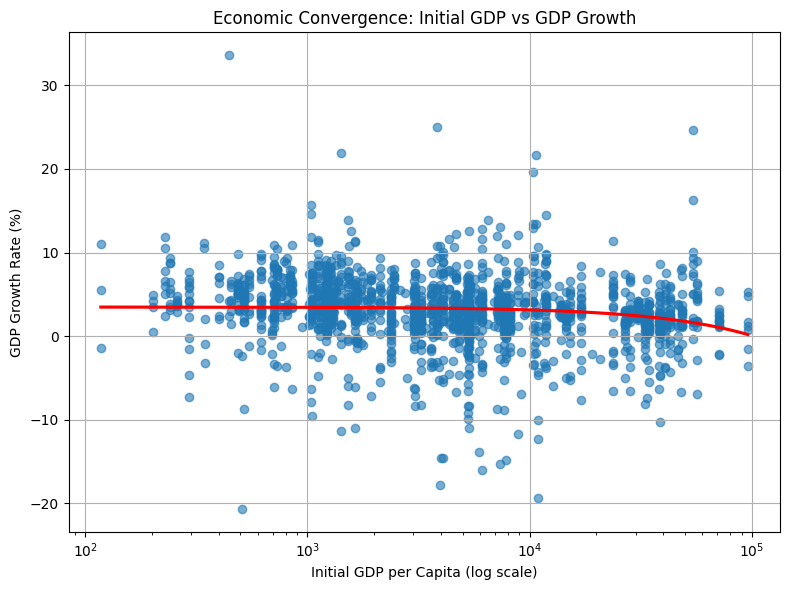

In [43]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x="initial_gdp",
    y="gdp_growth",
    scatter_kws={"alpha":0.6},
    line_kws={"color": "red"},
    ci=None
)
plt.xscale("log")
plt.title("Economic Convergence: Initial GDP vs GDP Growth")
plt.xlabel("Initial GDP per Capita (log scale)")
plt.ylabel("GDP Growth Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
Developed_pred=best_model_developed.predict(X)

In [45]:
developing_pred=best_model_developing.predict(X)

In [46]:
Developed_pred.mean()-developing_pred.mean()

np.float64(1.0940584056916438)

## Redo with 3 Clusters

Cluster centers (HDI): [[0.78110786]
 [0.92382788]
 [0.56508602]]
HDI_category
High HDI      703
Medium HDI    547
Low HDI       186
Name: count, dtype: int64


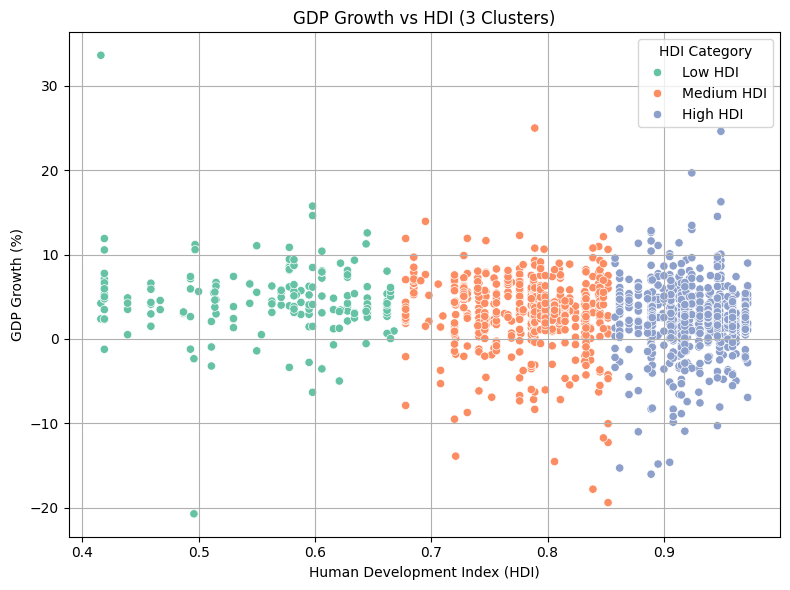

In [47]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
merged_df['HDI_cluster'] = kmeans_3.fit_predict(HDI)

# Show cluster centers
print("Cluster centers (HDI):", kmeans_3.cluster_centers_)

# Reorder cluster labels based on HDI center values
cluster_order = sorted([(i, center[0]) for i, center in enumerate(kmeans_3.cluster_centers_)], key=lambda x: x[1])
cluster_map = {old: new for new, (old, _) in enumerate(cluster_order)}
merged_df['HDI_cluster'] = merged_df['HDI_cluster'].map(cluster_map)

# Assign readable labels
HDI_labels = {0: 'Low HDI', 1: 'Medium HDI', 2: 'High HDI'}
merged_df['HDI_category'] = merged_df['HDI_cluster'].map(HDI_labels)

# Check counts
print(merged_df['HDI_category'].value_counts())

# Plot GDP Growth vs HDI, colored by cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x="HDI", y="gdp_growth", hue="HDI_category", data=merged_df, palette="Set2")
plt.title("GDP Growth vs HDI (3 Clusters)")
plt.xlabel("Human Development Index (HDI)")
plt.ylabel("GDP Growth (%)")
plt.grid(True)
plt.tight_layout()
plt.legend(title="HDI Category")
plt.show()

In [49]:
X_low_HDI = merged_df[merged_df['HDI_category'] == 'Low HDI'][features]
y_low_HDI = merged_df[merged_df['HDI_category'] == 'Low HDI']['gdp_growth']

X_medium_HDI = merged_df[merged_df['HDI_category'] == 'Medium HDI'][features]
y_medium_HDI = merged_df[merged_df['HDI_category'] == 'Medium HDI']['gdp_growth']

X_high_HDI = merged_df[merged_df['HDI_category'] == 'High HDI'][features]
y_high_HDI = merged_df[merged_df['HDI_category'] == 'High HDI']['gdp_growth']

## LOW HDI

In [51]:
X_train_low_HDI, X_test_low_HDI, y_train_low_HDI, y_test_low_HDI = train_test_split(X_low_HDI, y_low_HDI, test_size=0.2, random_state=42)

In [53]:
rf_model_low = RandomForestRegressor(random_state=42)
rf_model_low.fit(X_train_low_HDI, y_train_low_HDI)
y_pred_rf_low = rf_model_low.predict(X_test_low_HDI)
#score
print("Train R2:", r2_score(y_train_low_HDI, rf_model_low.predict(X_train_low_HDI)))
print("Test R2:", r2_score(y_test_low_HDI, y_pred_rf_low))

Train R2: 0.8276976553496218
Test R2: -0.0019100506446350085


In [63]:

grid_search_low= GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
grid_search_low.fit(X_train_low_HDI, y_train_low_HDI)
best_model_low = grid_search_low.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


KeyboardInterrupt: 

In [57]:
best_model_low.score(X_train_low_HDI, y_train_low_HDI)

0.3514018021408323

In [66]:
y_pred_grid_low = best_model_low.predict(X_test_low_HDI)
best_model_low.score(X_test_low_HDI, y_test_low_HDI)
#

0.024376204866293216

In [62]:
feature_importances_low = best_model_low.feature_importances_

## MEDIUM HDI

In [60]:
X_train_medium_HDI, X_test_medium_HDI, y_train_medium_HDI, y_test_medium_HDI = train_test_split(X_medium_HDI, y_medium_HDI, test_size=0.2, random_state=42)
#

In [61]:
rf_model_medium = RandomForestRegressor(random_state=42)
rf_model_medium.fit(X_train_medium_HDI, y_train_medium_HDI)
y_pred_rf_medium = rf_model_medium.predict(X_test_medium_HDI)
#score
print("Train R2:", r2_score(y_train_medium_HDI, rf_model_medium.predict(X_train_medium_HDI)))
print("Test R2:", r2_score(y_test_medium_HDI, y_pred_rf_medium))

Train R2: 0.8619863492576381
Test R2: -0.07914160562101014


In [69]:
grid_search_med= GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
grid_search_med.fit(X_train_medium_HDI, y_train_medium_HDI)
best_model_med = grid_search_med.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [70]:
best_model_med = grid_search_med.best_estimator_

In [72]:
y_pred_grid_med = best_model_med.predict(X_test_medium_HDI)
best_model_med.score(X_test_medium_HDI, y_test_medium_HDI)
#

0.09737434495291009

In [73]:
feature_importances_med = best_model_med.feature_importances_

## HIGH HDI

In [74]:
X_train_high_HDI, X_test_high_HDI, y_train_high_HDI, y_test_high_HDI = train_test_split(X_high_HDI, y_high_HDI, test_size=0.2, random_state=42)

In [75]:
rf_model_high = RandomForestRegressor(random_state=42)
rf_model_high.fit(X_train_high_HDI, y_train_high_HDI)
y_pred_rf_high = rf_model_high.predict(X_test_high_HDI)
#score
print("Train R2:", r2_score(y_train_high_HDI, rf_model_high.predict(X_train_high_HDI)))
print("Test R2:", r2_score(y_test_high_HDI, y_pred_rf_high))


Train R2: 0.8850122903428146
Test R2: 0.14683640301430956


In [76]:
grid_search_high = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
grid_search_high.fit(X_train_high_HDI, y_train_high_HDI)
best_model_high = grid_search_high.best_estimator_
#

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [77]:
y_pred_grid_high=best_model_high.predict(X_test_high_HDI)
best_model_high.score(X_test_high_HDI, y_test_high_HDI)

0.15211479861020094

In [78]:
feature_importances_high = best_model_high.feature_importances_


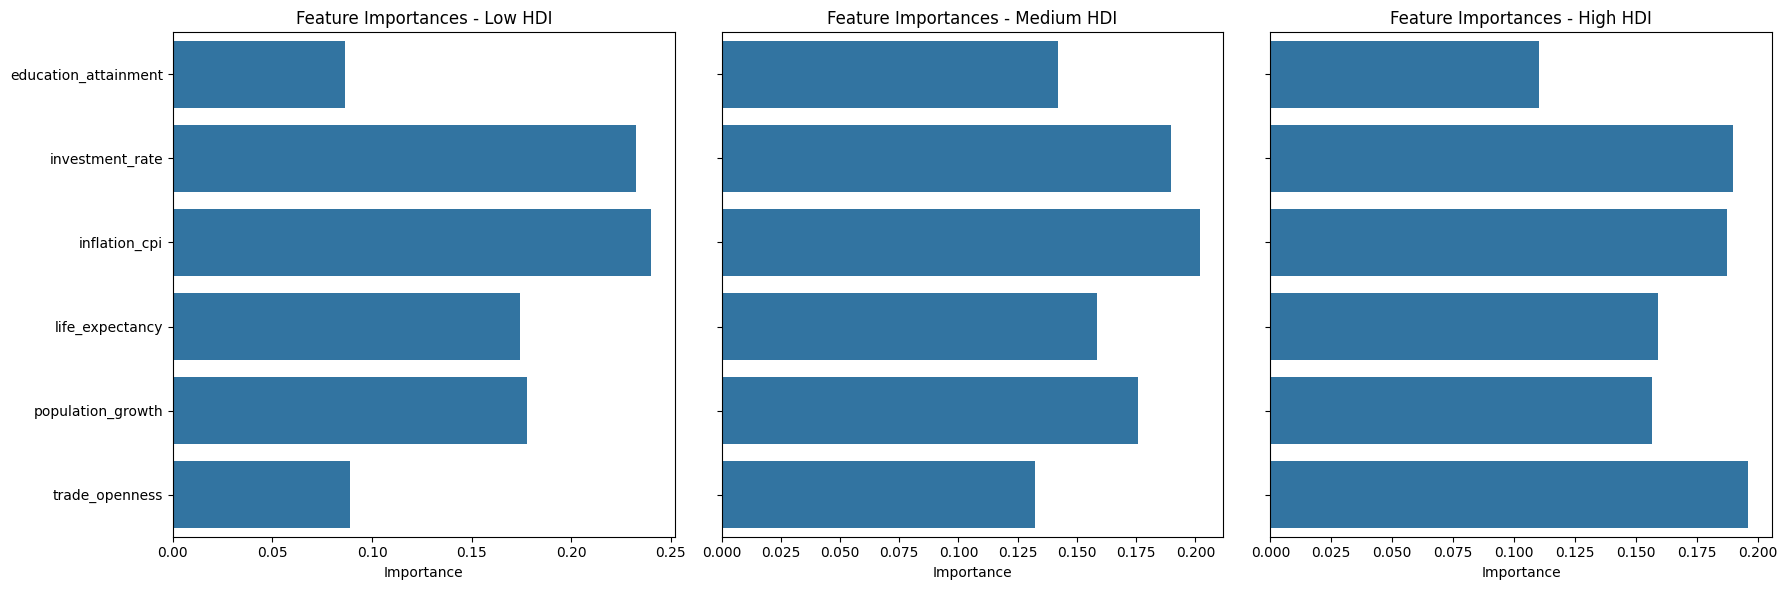

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(x=feature_importances_low, y=features, ax=axs[0])
axs[0].set_title("Feature Importances - Low HDI")
axs[0].set_xlabel("Importance")

sns.barplot(x=feature_importances_med, y=features, ax=axs[1])
axs[1].set_title("Feature Importances - Medium HDI")
axs[1].set_xlabel("Importance")

sns.barplot(x=feature_importances_high, y=features, ax=axs[2])
axs[2].set_title("Feature Importances - High HDI")
axs[2].set_xlabel("Importance")

plt.tight_layout()
plt.show()